In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pdb
import load

In [2]:
# load data
sim = 5
frac = 1
print('sim=' + str(sim))
print('frac=' + str(frac)) 
_, _, S, X, A_frac, A, neigh  = load.get_data(sim, 0)
n = S.shape[0]
da = A.shape[-1]
if frac:
    DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1_frac.npz')
else:
    DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1.npz')
w = DICT['w'].T

# get weight matrix, for x2
w1 = w[0:da,:]
w2 = w[da:da*2,:]
w3 = w[da*2:da*3,:]
w4 = w[da*3:da*4,:]
neigh = neigh.astype(int)
# we just care about int_on for now
x1 = X[:,0]#.reshape(n,1)
x3 = X[:,2]#.reshape(n,1)
K=25
A_ix = np.argmax(A,axis=1)


def EY(index,solution,a):
    #pdb.set_trace()
    neighS = S[index,neigh[index,:]]
    if MAX:
        first  = w1[a]*np.max(neighS*x1[neigh[index,:]])                                                 
        second = w2[a]*np.max(neighS*solution[neigh[index,:]].astype(float))                                                               
    else:
        first  = w1[a]*np.sum(neighS*x1[neigh[index,:]])                                                 
        second = w2[a]*np.sum(neighS*solution[neigh[index,:]].astype(float))                                                               
    third  = w3[a]*x3[index]
    fourth = w4[a]
    return first + second + third + fourth

def EY_inner(index,solution,a):
    neighS = S[index,neigh[index,:]]
    first  = np.dot(a,w1)*np.max(neighS*x1[neigh[index,:]])
    second = np.dot(a,w2)*np.max(neighS*solution[neigh[index,:]].astype(float))
    third  = np.dot(a,w3)*x3[index]
    fourth = np.dot(a,w4)
    return first + second + third + fourth





# TAUS = np.linspace(0.04, 0.16, 20)
# TAU_DIFF = TAUS[1]-TAUS[0]
# bb = [0.04-(a*TAU_DIFF) for a in np.arange(1,2)]
# bb = np.flip(bb,axis=0)
# cc = [0.16+(a*TAU_DIFF) for a in np.arange(1,5)]
# TAUS = np.concatenate((bb,TAUS,cc))

DICT = np.load('results/TAUS_frac.npz')
TAUS = DICT['TAUS']
C = len(TAUS)

f_obj = np.zeros((C,))
f_perc = np.zeros((C,3))
count = 0
A_total = np.sum(A,axis=0)
f_added = np.zeros((C,3))
#pdb.set_trace()
print(TAUS)
for Tau in TAUS:
    print(Tau)
    if frac:
        filename = 'results/max_fair_k' + str(K) + '_' + str(Tau) + '_sim' + str(sim) + '_frac.npz'
    else:
        filename = 'results/max_fair_k' + str(K) + '_' + str(Tau) + '_sim' + str(sim) + '.npz'
    DICT = np.load(filename)
    sol = DICT['sol']
    if np.sum(sol) > 0:
        for i in range(n):
            if frac:
                f_obj[count] += EY_inner(i,sol,A_frac[np.newaxis,i,:])#A_ix[i])
            else:
                f_obj[count] += EY(i,sol,A_ix[i])
        A_added = np.sum(A[sol,:],axis=0)
        f_added[count,:] = A_added
        f_perc[count,:]  = A_added / A_total
    count += 1

if frac:
    filename = 'results/max_fair_k' + str(K) + '_' + str(TAUS[-1]) + '_sim' + str(sim) + '_frac.npz'
else:
    filename = 'results/max_fair_k' + str(K) + '_' + str(TAUS[-1]) + '_sim' + str(sim) + '.npz'
DICT = np.load(filename)
u_sol = DICT['sol']
u_obj = 0.0
#u_perc = np.zeros((1,3))
for i in range(n):
    if frac:
        u_obj += EY_inner(i,u_sol,A_frac[np.newaxis,i,:])
    else:
        u_obj += EY(i,u_sol,A_ix[i])
u_added = np.sum(A[u_sol,:],axis=0)
u_perc  = u_added / A_total

sim=5
frac=1
[0.03368421 0.04       0.04631579 0.05263158 0.05894737 0.06526316
 0.07157895 0.07789474 0.08421053 0.09052632 0.09684211 0.10315789
 0.10947368 0.11578947 0.12210526 0.12842105 0.13473684 0.14105263
 0.14736842 0.15368421 0.16       0.16631579 0.17263158 0.17894737
 0.18526316]
0.03368421052631579
0.04
0.04631578947368421
0.05263157894736842
0.05894736842105263
0.06526315789473684
0.07157894736842105
0.07789473684210527
0.08421052631578947
0.09052631578947368
0.0968421052631579
0.10315789473684212
0.1094736842105263
0.11578947368421053
0.12210526315789474
0.12842105263157894
0.13473684210526315
0.14105263157894737
0.14736842105263157
0.15368421052631578
0.16
0.16631578947368422
0.1726315789473684
0.17894736842105263
0.18526315789473685


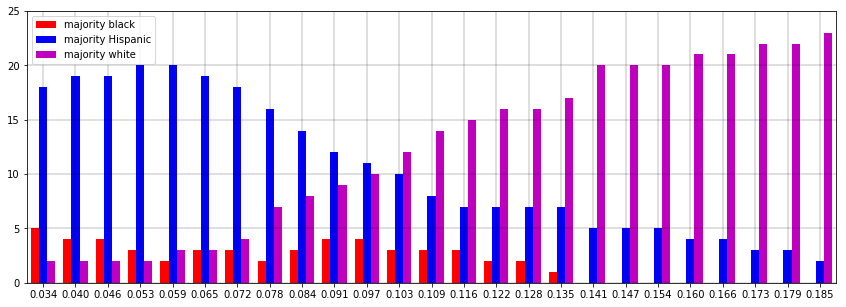

In [10]:
#from matplotlib.basic_units import cm, inch
fig, ax = plt.subplots(figsize=(14.5, 5))
ind = np.arange(0,C*2,2)#[1:]
ax.grid(color='k', linestyle='-', linewidth=0.25)
width = 0.5
p1 = ax.bar(ind, f_added[:,0], width, color='r')
p2 = ax.bar(ind+width, f_added[:,1], width, color='b')
p3 = ax.bar(ind+width*2, f_added[:,2], width, color='m')
#ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width)
labs = ["%.3f" % round(a,3) for a in TAUS]#[1:]]
ax.set_xticklabels(labs)
#ax.set_yticklabels(np.arange(0,50,5))

plt.yticks(np.arange(0,26,5))
plt.axis([-0.5, C*2-0.5, 0, 25])
ax.legend((p1[0], p2[0], p3[0]), ('majority black', 'majority Hispanic', 'majority white'))
#ax.yaxis.set_units(inch)
#ax.autoscale_view()
#plt.show()
if frac:
    plt.savefig('bar_K25_max_race_alloc_sim5_frac.pdf', bbox_inches='tight')
else:
    plt.savefig('bar_K25_max_race_alloc_sim5.pdf', bbox_inches='tight')

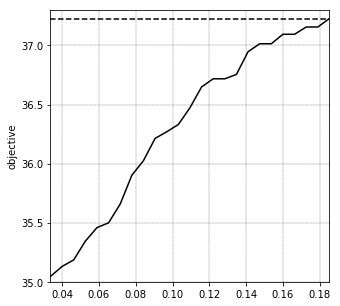

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.plot(TAUS, np.repeat(u_obj[0], len(TAUS)), '--k')
plt.plot(TAUS, f_obj, '-k')
#plt.legend(['unconstrained', 'constrained'], loc='upper left')
ax.grid(color='k', linestyle='--', linewidth=0.25)
plt.axis([TAUS[0], TAUS[-1], 35.0,37.3])
plt.ylabel('objective')
#plt.show()
if frac:
    plt.savefig('max_K25_race_obj_sim5_frac.pdf', bbox_inches='tight')
else:
    plt.savefig('max_K25_race_obj_sim5.pdf', bbox_inches='tight')

## Parity Constraint

In [2]:
sim=5
TT=1
K = 25
_, _, S, X, A, A_oh, neigh = load.get_data(sim, 0)
n = S.shape[0]
da = A.shape[-1]

# 1. load weights of causal model
DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1_frac.npz')
w = DICT['w'].T
w1 = w[0:da,:]
w2 = w[da:da*2,:]
w3 = w[da*2:da*3,:]
w4 = w[da*3:da*4,:]
neigh = neigh.astype(int)
x1 = X[:,0]
x3 = X[:,2]


bit_mask=np.zeros([2**neigh.shape[1],neigh.shape[1]])
ints=np.arange(2**neigh.shape[1],dtype=np.int)
for i in range(neigh.shape[1]):
    bit_mask[:,i]=ints%2
    ints//=2




def EY_inner(index,solution,a):
    neighS = S[index,neigh[index,:]]
    first  = np.dot(a,w1)*np.max(neighS*x1[neigh[index,:]])
    second = np.dot(a,w2)*np.max(neighS*solution[neigh[index,:]].astype(float))
    third  = np.dot(a,w3)*x3[index]
    fourth = np.dot(a,w4)
    return first + second + third + fourth



filename = 'results/max_parity_k' + str(K) + '_sim' + str(sim) + '_frac' 
timename = 'results/time_parity_k' + str(K) + '_sim' + str(sim) + '_t' + str(1) + '_frac'              
DICT = np.load(filename + '.npz')
u_sol = DICT['sol']
u_obj = 0.0
#u_perc = np.zeros((1,3))
#import pdb
#pdb.set_trace()
for i in range(n):
    u_obj += EY_inner(i,u_sol,A[np.newaxis,i,:])
u_added = np.sum(A[u_sol,:],axis=0)
A_total = np.sum(A, axis=0)
u_perc  = u_added / A_total
u_obj

array([[36.41529299]])

## Minority Constraint

In [3]:
_, _, S, X, A, A_oh, neigh = load.get_data(sim, 1)

n = S.shape[0]
da = A.shape[-1]
K=25

# 1. load weights of causal model                                                                                
DICT = np.load('school_weights_linear_mse_sim' + str(sim) + '_max1_frac.npz')                                    
w = DICT['w'].T                                                                                                  
w1 = w[0:da,:]                                                                                                   
w2 = w[da:da*2,:]
w3 = w[da*2:da*3,:]
w4 = w[da*3:da*4,:]
neigh = neigh.astype(int)                                                                                        
x1 = X[:,0]
x3 = X[:,2]

filename = 'results/max_minority_k' + str(K) + '_sim' + str(sim) + '_frac'
timename = 'results/time_minority_k' + str(K) + '_sim' + str(sim) + '_t' + str(1) + '_frac'
DICT = np.load(filename + '.npz')
u_sol = DICT['sol']
u_obj = 0.0
for i in range(n):
    u_obj += EY_inner(i,u_sol,A[np.newaxis,i,:])
u_added = np.sum(A[u_sol,:],axis=0)
A_total = np.sum(A, axis=0)
u_perc  = u_added / A_total
u_obj

array([[33.42921265]])

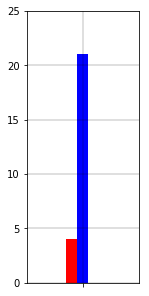

In [32]:
#from matplotlib.basic_units import cm, inch
fig, ax = plt.subplots(figsize=(2, 5))
ind = 1.5#np.arange(0,2,2)#[1:]
ax.grid(color='k', linestyle='-', linewidth=0.25)
width = 0.5
p1 = ax.bar(ind,A_added[0], width, color='r')
p2 = ax.bar(ind+width, A_added[1], width, color='b')
p3 = ax.bar(ind+width*2, A_added[2], width, color='m')
#ax.set_title('Scores by group and gender')
ax.set_xticks([ind + width])
labs = [""]#["%.3f" % round(a,3) for a in TAUS]#[1:]]
ax.set_xticklabels(labs)
#ax.set_yticklabels(np.arange(0,50,5))

plt.yticks(np.arange(0,26,5))
plt.axis([-0.5, 5-0.5, 0, 25])
#ax.legend((p1[0], p2[0], p3[0]), ('majority black', 'majority Hispanic', 'majority white'))
#ax.yaxis.set_units(inch)
#ax.autoscale_view()
#plt.show()
plt.savefig('bar_K25_minority_sim5_frac.pdf', bbox_inches='tight')
#if frac:
#    plt.savefig('bar_K25_max_race_alloc_sim5_frac.pdf', bbox_inches='tight')
#else:
#    plt.savefig('bar_K25_max_race_alloc_sim5.pdf', bbox_inches='tight')